This notebook is for applying the models to the IEEE transaction data set that includes both valid and fraudulent transactions

Only the primary paper used the data set.  Will do feature engineering per the primary paper and apply it to as many of the models as possible.

1. Feature Engineering per the primary paper
2. Primary paper Enhanced Recall Model with Full Imbalanced Data
3. Primary paper Enhanced Recall Model Ensemble with SMOTE oversampling of the minority class
4. Primary paper Enhanced Recall Model Ensemble with SMOTE oversampling of the minority class using hyperparameters from Stratified 5 Fold Cross-Validation.
5. Secondary paper Models with SMOTE oversampling of the minority class

While this code is my own work the models used are implemented as described in:

Chung, Jiwon, and Kyung-Ho Lee. “Credit Card Fraud Detection: An Improved 
Strategy for High Recall Using KNN, LDA, and Linear Regression.” Sensors, 
vol. 23, no. 18, Sept. 2023, p. 7788. https://doi.org/10.3390/s2318778

Afriyie, Jonathan Kwaku, et al. “A Supervised 
Machine Learning Algorithm for Detecting and 
Predicting Fraud in Credit Card Transactions.” 
Decision Analytics Journal, vol. 6, Mar. 2023, p. 
100163. https://doi.org/10.1016/j.dajour.2023.100163.

Xia, Jianglin. “Credit Card Fraud Detection Based on 
Support Vector Machine.” Highlights in Science 
Engineering and Technology, vol. 23, Dec. 2022, pp. 
93–97. https://doi.org/10.54097/hset.v23i.3202163.

Dataset used:

https://www.kaggle.com/c/ieee-fraud-detection/data

Functions that define the various iteration of models:

In [1]:
import pandas as pd
import numpy as np

# Function to read dataset and return a dataframe.  Input the filename
def read_dataset(file_name):
    

    # Concatenate the file name with the path to the project data directory
    file_path = '.\\data\\' + file_name

    # Load csv into a dataframe
    df = pd.read_csv(file_path)
    
    # Return the dataframe
    return df

# Function to check for null data
def has_null_values(df):
    return df.isnull().values.any()

def count_unique_values(df):
    for column in df.columns:
        print(column, df[column].nunique())
    return

# Function to lable encode the categorical features of a dataframe.
# Input the list of columns to be encoded.
def label_encode_dataset(categorical_features, df):
    from sklearn.preprocessing import LabelEncoder

    # Create a LabelEncoder instance
    label_encoder = LabelEncoder()


    # Apply label encoding to each column in the DataFrame
    for column in categorical_features:
        df.loc[:, column] = label_encoder.fit_transform(df.loc[:, column])
    
    return df

# Function to split the dataset into a features only and targets only dataframes
# Input dataframe to split, list of feature column names and list of target column names.
def split_features_target(df, feature_cols, target_col):
    # X is the features only dataframe.  Includes all but last column
    X = df[feature_cols]
    # y is the target dataframe
    y = df[target_col]

    
    return X, y

# Define the models used in the primary paper
def define_primary_models(features, targets):
    #Set up models
    from sklearn.model_selection import StratifiedKFold, cross_val_predict
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import accuracy_score, mean_squared_error

    # K-Nearest Neighbors (KNN) model with 5-fold stratified cross-validation
    # set hyperparameter values
    algorithm_val = 'auto'
    leaf_size_val = 30
    metric_val = 'minkowski'
    metric_params_val = None
    n_jobs_val = -1
    n_neighbors_val = 5
    p_val = 2
    weights_val = 'uniform'
    # define the knn model
    knn =  KNeighborsClassifier(n_neighbors=n_neighbors_val,
                                weights=weights_val,
                                algorithm=algorithm_val,
                                leaf_size=leaf_size_val,
                                metric=metric_val,
                                metric_params=metric_params_val,
                                p=p_val,
                                n_jobs=n_jobs_val
                                )
    # get predictions using stratified Kfold CV of 5
    p_knn = cross_val_predict(knn, features, targets, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
    
    # Linear Discriminant Analysis (LDA) model with 5-fold stratified cross-validation
    # set hyperparameter values
    covariance_estimator_val = None
    n_components_val = None
    priors_val = None
    shrinkage_val = None
    solver_val = 'svd'
    store_covariance_val = False
    tol_val = 0.0001
    # define the lDA Model
    lda = LinearDiscriminantAnalysis(solver=solver_val,
                                     shrinkage=shrinkage_val,
                                     priors=priors_val,
                                     n_components=n_components_val,
                                     store_covariance=store_covariance_val,
                                     tol=tol_val,
                                     covariance_estimator=covariance_estimator_val
                                    )
    # Get predictions with stratified kfold CV of 5
    p_lda = cross_val_predict(lda, features, targets, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))

    # Linear Regression model with 5-fold cross-validation (not stratified for regression)
    lr = LinearRegression()
    p_lr = cross_val_predict(lr, features, targets, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42))
        
    return p_knn, p_lda, p_lr

def validate_primary_models(features, targets, test):
    #Set up models
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import accuracy_score, mean_squared_error

    # K-Nearest Neighbors (KNN) model with 5-fold stratified cross-validation
    # set hyperparameter values
    algorithm_val = 'auto'
    leaf_size_val = 30
    metric_val = 'minkowski'
    metric_params_val = None
    n_jobs_val = -1
    n_neighbors_val = 5
    p_val = 2
    weights_val = 'uniform'
    # define the knn model
    knn =  KNeighborsClassifier(n_neighbors=n_neighbors_val,
                                weights=weights_val,
                                algorithm=algorithm_val,
                                leaf_size=leaf_size_val,
                                metric=metric_val,
                                metric_params=metric_params_val,
                                p=p_val,
                                n_jobs=n_jobs_val
                                )
    # train the model
    knn.fit(features, targets)

    # make predictions
    p_knn = knn.predict(test)
    
    # Linear Discriminant Analysis (LDA) model with 5-fold stratified cross-validation
    # set hyperparameter values
    #Best LDA Hyperparameters: {'covariance_estimator': None, 'n_components': None,
    #'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': True, 'tol': 0.0001}
    covariance_estimator_val = None
    n_components_val = None
    priors_val = None
    shrinkage_val = None
    solver_val = 'svd'
    store_covariance_val = False
    tol_val = 0.0001
    # define the lDA Model
    lda = LinearDiscriminantAnalysis(solver=solver_val,
                                     shrinkage=shrinkage_val,
                                     priors=priors_val,
                                     n_components=n_components_val,
                                     store_covariance=store_covariance_val,
                                     tol=tol_val,
                                     covariance_estimator=covariance_estimator_val
                                    )
    # train the model
    lda.fit(features, targets)

    # make predictions
    p_lda = lda.predict(test)

    # Linear Regression model with 5-fold cross-validation (not stratified for regression)
    lr = LinearRegression()
    
    # train the model
    lr.fit(features, targets)

    # make predictions
    p_lr = lr.predict(test)
    
    return p_knn, p_lda, p_lr

# Use the parameters found from grid search
def define_primary_models_tuned(features, targets, best_knn_parms, best_lda_parms, best_lr_parms):
    #Set up models
    from sklearn.model_selection import StratifiedKFold, cross_val_predict
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import accuracy_score, mean_squared_error

    # K-Nearest Neighbors (KNN) model
    # set hyperparameter values
    algorithm_val = best_knn_parms['algorithm']
    leaf_size_val = best_knn_parms['leaf_size']
    metric_val = best_knn_parms['metric']
    #n_jobs_val = best_knn_parms['n_jobs']
    n_neighbors_val = best_knn_parms['n_neighbors']
    p_val = best_knn_parms['p']
    weights_val = best_knn_parms['weights']
    # define the knn model
    knn =  KNeighborsClassifier(n_neighbors=n_neighbors_val,
                                weights=weights_val,
                                algorithm=algorithm_val,
                                leaf_size=leaf_size_val,
                                metric=metric_val,
                                p=p_val#,
                                #n_jobs=n_jobs_val
                                )
    # Train and predict
    knn.fit(features, targets)
    p_knn = knn.predict(features)

    # Linear Discriminant Analysis (LDA) model
    # set hyperparameter values
    #  LDA: {'covariance_estimator': None, 'n_components': None, 'priors': None, 
    #    'shrinkage': 'auto', 'solver': 'eigen', 'store_covariance': True, 'tol': 0.0001}
    covariance_estimator_val = best_lda_parms['covariance_estimator']
    n_components_val = best_lda_parms['n_components']
    priors_val = best_lda_parms['priors']
    shrinkage_val = best_lda_parms['shrinkage']
    solver_val = best_lda_parms['solver']
    store_covariance_val = best_lda_parms['store_covariance']
    tol_val = best_lda_parms['tol']
    # define the lDA Model
    lda = LinearDiscriminantAnalysis(solver=solver_val,
                                     shrinkage=shrinkage_val,
                                     priors=priors_val,
                                     n_components=n_components_val,
                                     store_covariance=store_covariance_val,
                                     tol=tol_val,
                                     covariance_estimator=covariance_estimator_val
                                    )
    # train and predict
    lda.fit(features, targets)
    p_lda = lda.predict(features)

    # Linear Regression model
    lr = LinearRegression(copy_X= best_lr_parms['copy_X'], fit_intercept=best_lr_parms['fit_intercept'], 
                          positive=best_lr_parms['positive'])
    lr.fit(features, targets)
    p_lr = lr.predict(features)
    
    return p_knn, p_lda, p_lr

# Use the parameters found from grid search
#p_knn, p_lda, p_lr = validate_primary_models_tuned(X_smote, y_smote, X_test, best_knn_parms, best_lda_parms, best_lr_parms)    
def validate_primary_models_tuned(features, targets, test, best_knn_parms, best_lda_parms, best_lr_parms):
    #Set up models
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import accuracy_score, mean_squared_error

    # K-Nearest Neighbors (KNN) model with 5-fold stratified cross-validation
    # set hyperparameter values
    algorithm_val = best_knn_parms['algorithm']
    leaf_size_val = best_knn_parms['leaf_size']
    metric_val = best_knn_parms['metric']
    n_jobs_val = best_knn_parms['n_jobs']
    n_neighbors_val = best_knn_parms['n_neighbors']
    p_val = best_knn_parms['p']
    weights_val = best_knn_parms['weights']
    # define the knn model
    knn =  KNeighborsClassifier(n_neighbors=n_neighbors_val,
                                weights=weights_val,
                                algorithm=algorithm_val,
                                leaf_size=leaf_size_val,
                                metric=metric_val,
                                p=p_val,
                                n_jobs=n_jobs_val
                                )
    # train the model
    knn.fit(features, targets)

    # get predictions
    p_knn = knn.predict(test)
    
    # Linear Discriminant Analysis (LDA) model with 5-fold stratified cross-validation
    # set hyperparameter values
    #  LDA: {'covariance_estimator': None, 'n_components': None, 'priors': None, 
    #    'shrinkage': 'auto', 'solver': 'eigen', 'store_covariance': True, 'tol': 0.0001}
    covariance_estimator_val = best_lda_parms['covariance_estimator']
    n_components_val = best_lda_parms['n_components']
    priors_val = best_lda_parms['priors']
    shrinkage_val = best_lda_parms['shrinkage']
    solver_val = best_lda_parms['solver']
    store_covariance_val = best_lda_parms['store_covariance']
    tol_val = best_lda_parms['tol']
    # define the lDA Model
    lda = LinearDiscriminantAnalysis(solver=solver_val,
                                     shrinkage=shrinkage_val,
                                     priors=priors_val,
                                     n_components=n_components_val,
                                     store_covariance=store_covariance_val,
                                     tol=tol_val,
                                     covariance_estimator=covariance_estimator_val
                                    )
    # train the model
    lda.fit(features, targets)

    # get predictions
    p_lda = lda.predict(test)
   
    # Linear Regression model with 5-fold cross-validation (not stratified for regression)
    # Linear Regression: {'copy_X': True, 'fit_intercept': False, 'positive': True}
    lr = LinearRegression(copy_X= best_lr_parms['copy_X'], fit_intercept=best_lr_parms['fit_intercept'], 
                          positive=best_lr_parms['positive'])
    
    # train the model
    lr.fit(features, targets)

    # get predictions
    p_lr = lr.predict(test)
      
    return p_knn, p_lda, p_lr

# Define the models used in the primary paper
def define_secondary_models(features, targets, test_features):

    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    
    # Create a Decision Tree, Random Forest and Logistic Regression models
    dt = DecisionTreeClassifier(random_state=42)
    rf = RandomForestClassifier(random_state=42)
    log_r = LogisticRegression(class_weight='balanced', C=0.1, penalty='l2')#random_state=42)
                               
    # Train the models on the training data
    dt.fit(features, targets)
    rf.fit(features, targets)
    log_r.fit(features, targets)                                                           

    # Make predictions on the test data
    p_dt = dt.predict(test_features)
    p_rf = rf.predict(test_features)
    p_log_r = log_r.predict(test_features)
                               
    return p_dt, p_rf, p_log_r

# Define the models used in the primary paper
def define_tertiary_models(features, targets, test_features, hyperparameters):
    from sklearn.svm import SVC
        
    svm = SVC(**hyperparameters)
    svm.fit(features, targets)
    p_svm = svm.predict(test_features) 
    
    return p_svm

# Convert LR Model continuous to discrete by comparing to the mean
def get_lr_d_values(p_lr, lr_mean):
    
    data_length = len(p_lr)

    p_lr_d = np.zeros([data_length])
    
    for i in range(data_length):
        if p_lr[i] < lr_mean:
            p_lr_d[i] = 0
        else:
            p_lr_d[i] = 1

    return p_lr_d


# Algorithm used in the primary paper to enhnace recall
def enhanced_recall(p_knn, p_lda, p_lr, mv_lr):
    import numpy as np
    
    # determine the size of the dataset
    data_length = len(p_knn)
    # initialize an array of zeros
    p_or = np.zeros([data_length])
    
    # Iterate through rows using index positions
    for i in range(data_length):
        if (p_knn[i]==0 or p_lda[i] == 0) and p_lr[i] < mv_lr:
            p_or[i] = 0
        elif (p_knn[i]==1 or p_lda[i] == 1) and p_lr[i] >= mv_lr:
            p_or[i] = 1
        else:
            p_or[i] = p_knn[i]

    return p_or

# function to provide classifier metrics
# input true and predicted label sets
def calculate_classifier_metrics(true_labels, predicted_labels):
    from sklearn.metrics import precision_recall_fscore_support, accuracy_score
    # Calculate model accuracy
    accuracy = accuracy_score(true_labels, predicted_labels)
    # Calculate precision, recall, and F1 score
    precision, recall, f1, _ = precision_recall_fscore_support(true_labels, predicted_labels, average='binary')
    
    return precision, recall, f1, accuracy

def get_classifcation_report(true_labels, predicted_labels, name):
    from sklearn.metrics import classification_report
    from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import ConfusionMatrixDisplay
    import matplotlib.pyplot as plt
    
    cm_report = classification_report(true_labels, predicted_labels)
    #print(cm_report)
    
    cm = confusion_matrix(true_labels, predicted_labels)
    cm_display = ConfusionMatrixDisplay(cm).plot()
    cm_display.ax_.set_title(name)
    plt.show()

    return cm_report

# function to provide regression metrics
# input true and predicted label sets
def calculate_regression_metrics(true_labels, predicted_labels):
    from sklearn.metrics import accuracy_score, mean_squared_error
    # Calculate mean squared error
    mse = mean_squared_error(true_labels, predicted_labels)
    
    return mse

# Function to do a hyper-parameter grid search for KNN
def get_best_knn_parms(X_train, y_train):
    from sklearn.model_selection import GridSearchCV, StratifiedKFold
    from sklearn.neighbors import KNeighborsClassifier
    # Used in the primary paper
    # algorithm_val = 'auto'
    # leaf_size_val = 30
    # metric_val = 'minkowski'
    # metric_params_val = None
    # n_jobs_val = -1
    # n_neighbors_val = 5
    # p_val = 2
    # weights_val = 'uniform'
    hyper_params = {'n_neighbors': [3, 5, 7],
                    'weights': ['uniform', 'distance'],
                    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                    'leaf_size': [20, 30, 40],
                    'p': [1, 2],
                    'metric': ['euclidean', 'manhattan', 'minkowski']#,
                    #'n_jobs': [-1, 1] 
                   }

    knn = KNeighborsClassifier()
    stratified_cv = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(knn, hyper_params, cv=stratified_cv)
    grid_search.fit(X_train, y_train)

    return grid_search.best_params_    

# Function to do a hyper-paramter grid search for LDA    
def get_best_lda_parms(X_train, y_train):    
    
    #  From Primary paper
    #covariance_estimator_val = None
    #n_components_val = None
    #priors_val = None
    #shrinkage_val = None
    #solver_val = 'svd'
    #store_covariance_val = False
    #tol_val = 0.0001
    
    from sklearn.model_selection import GridSearchCV, StratifiedKFold
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    
    hyper_params = {'solver': ['svd', 'lsqr', 'eigen'],
                    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9],  # Only applicable for 'lsqr' and 'eigen' solvers
                    'priors': [None],  # Prior probabilities of the classes (usually None for estimation from data)
                    'n_components': [None],  # Number of components (if None, it will be automatically determined)
                    'tol': [1e-4, 1e-3, 1e-2],  # Tolerance to declare convergence
                    'covariance_estimator': [None],
                    'store_covariance': [True, False]  # Whether to store the covariance matrix during training
                 }
    
    lda = LinearDiscriminantAnalysis()
    stratified_cv = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(lda, hyper_params, cv=stratified_cv)
    grid_search.fit(X_train, y_train)

    return grid_search.best_params_    

# Function to do a hyper-parameter grid search for Linear Regression
def get_best_lr_parms(X_train, y_train):
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import GridSearchCV, StratifiedKFold

    hyper_params = {'fit_intercept': [True, False],
                    'copy_X': [True, False], 
                    'positive': [True, False]}

    lr = LinearRegression()
    stratified_cv = StratifiedKFold(n_splits=5)   
    grid_search = GridSearchCV(lr, hyper_params, cv=stratified_cv, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    return grid_search.best_params_

def plot_roc(y_preds, model_names):
    # Generate predictions for each model (assuming y_test and y_pred_proba are available for each model)
    from sklearn.metrics import roc_curve, auc
    
    # Plot ROC curve for each model
    plt.figure(figsize=(8, 6))  # Set plot size
    for y_pred, model_name in zip(y_preds, model_names):
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
      
    # Plot random classifier (diagonal line)
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')
    
    # Set labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    
    # Show plot
    plt.show()

Feature Engineering of the data according to the primary paper.
1. Use just the train transaction data with 394 columns
2. Count the number of missing values for each column and determine the median missing values
3. Eliminate any column that is below the median.
4. Impute all missing values to the median value of the column

In [2]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Read data file
df_trans = read_dataset('train_transaction.csv')

# Count the number of missing values
missing_values_count = df_trans.isna().sum(axis=0)
# Identify the median
median_missing_values = missing_values_count.median()
# Identify which values are less than or equal the median, which eliminates those below the median
columns_below_median = missing_values_count[missing_values_count <= median_missing_values]

# Target column list
target = ['isFraud']

# Feature column list
features = columns_below_median.index.tolist()
features.remove('isFraud')
features.remove('TransactionID')
# 
# Eliminate the columns not to be used.
df = df_trans[columns_below_median.index]

# Get the features
X = df.iloc[:, 2:]

# Get the target
y = df[target]

category_features = [col for col in X.columns if X[col].dtype not in ['float64', 'int64']]

# lable encode the category features
X = label_encode_dataset(category_features, X)  

# impute the missing values of each feature to the median value of that column
X = X.fillna(X.median())

# Scale the fetures
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Categorical features

Full input dataset

In [3]:
df_trans

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Features after dimensionatlity reduction

In [4]:
df.iloc[:, 2:]

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


data after dimensionality reduction, Null values set to feature's mean, and scaling.

In [5]:
X

array([[0.00000000e+00, 2.13697908e-03, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [6.35940926e-08, 9.00174530e-04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.38799239e-06, 1.83951976e-03, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [9.99996693e-01, 9.61231970e-04, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99997265e-01, 3.65558719e-03, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 8.75779735e-03, 1.00000000e+00, ...,
        2.69027496e-03, 2.69027496e-03, 2.69027496e-03]])

In [6]:
X.shape

(590540, 199)

Feature Engineering is complete and ready for training/test split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Flatten to address data type error coming from model
y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

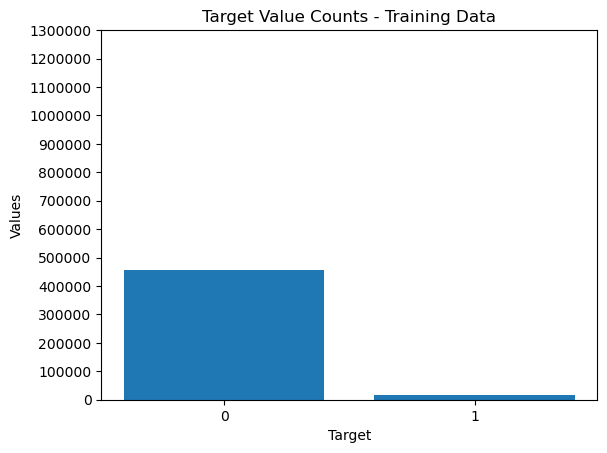

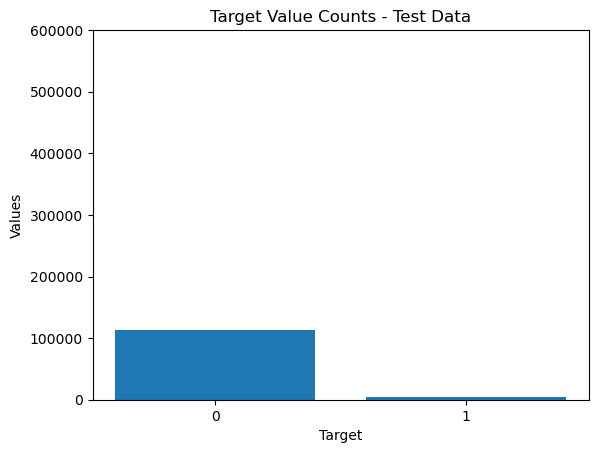

In [8]:
import matplotlib.pyplot as plt

fraud_values, fraud_counts = np.unique(y_train, return_counts=True)
count_dict = dict(zip(fraud_values, fraud_counts))
count_series = pd.Series(count_dict)


# Creating the bar plot
plt.bar(count_series.index, count_series.values)
plt.xticks(count_series.index, ['0', '1'])
plt.yticks(range(0, 1300001, 100000), [str(i) for i in range(0, 1300001, 100000)])
plt.title('Target Value Counts - Training Data')
plt.xlabel('Target')
plt.ylabel('Values')

# Displaying the plot
plt.show()

fraud_values_test, fraud_counts_test = np.unique(y_test, return_counts=True)
count_test_dict = dict(zip(fraud_values_test, fraud_counts_test))
count_series_test = pd.Series(count_test_dict)  

plt.bar(count_series_test.index, count_series_test.values)
plt.xticks(count_series_test.index, ['0','1'])
plt.yticks(range(0, 600001, 100000), [str(i) for i in range(0, 600001, 100000)])
plt.title('Target Value Counts - Test Data')
plt.xlabel('Target')
plt.ylabel('Values')

# Displaying the plot
plt.show()

First iteration of models:  Primary paper's Enhanced Recall Ensemble model using imbalanced data

Training Data Evaluation
Scores with Full Imbalanced Data using Documented Model and Hyperparameters
Uses 5 Fold Cross-Validation


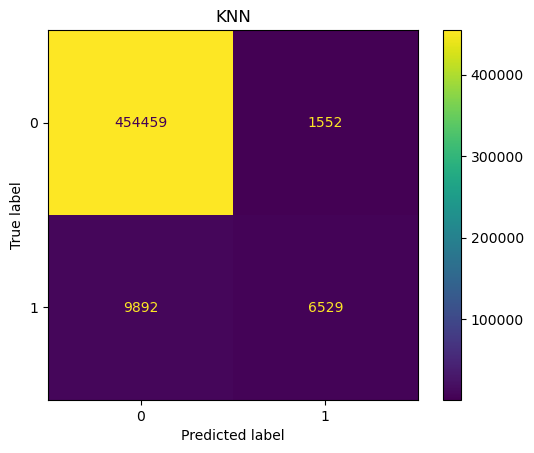

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    456011
           1       0.81      0.40      0.53     16421

    accuracy                           0.98    472432
   macro avg       0.89      0.70      0.76    472432
weighted avg       0.97      0.98      0.97    472432



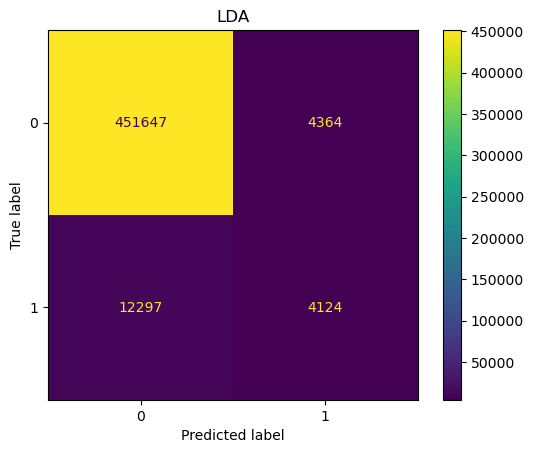

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    456011
           1       0.49      0.25      0.33     16421

    accuracy                           0.96    472432
   macro avg       0.73      0.62      0.66    472432
weighted avg       0.96      0.96      0.96    472432



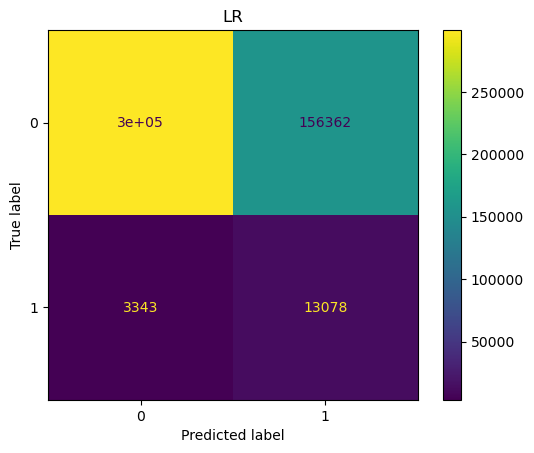

              precision    recall  f1-score   support

           0       0.99      0.66      0.79    456011
           1       0.08      0.80      0.14     16421

    accuracy                           0.66    472432
   macro avg       0.53      0.73      0.47    472432
weighted avg       0.96      0.66      0.77    472432



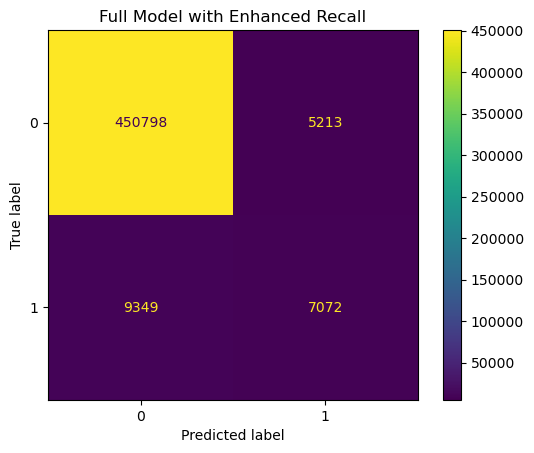

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    456011
           1       0.58      0.43      0.49     16421

    accuracy                           0.97    472432
   macro avg       0.78      0.71      0.74    472432
weighted avg       0.97      0.97      0.97    472432

Test Data Evaluation
Scores with Full Imbalanced Data using Documented Model and Hyperparameters
Models Trained with Complete Training Dataset.  Predictions Made with Test Dataset


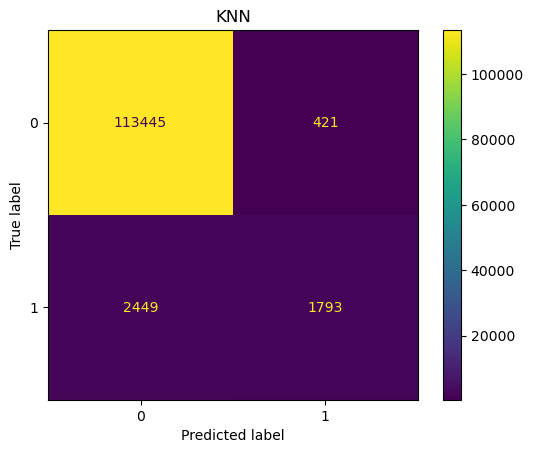

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113866
           1       0.81      0.42      0.56      4242

    accuracy                           0.98    118108
   macro avg       0.89      0.71      0.77    118108
weighted avg       0.97      0.98      0.97    118108



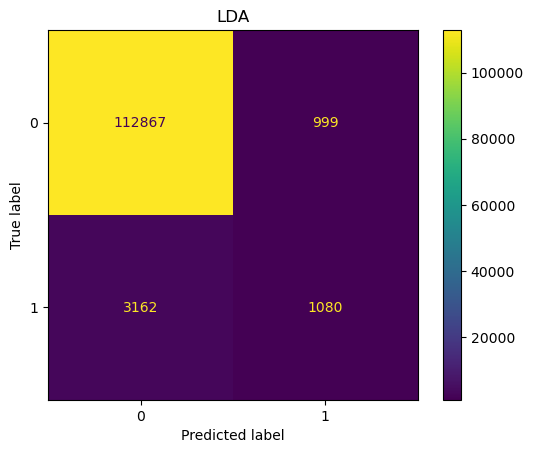

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    113866
           1       0.52      0.25      0.34      4242

    accuracy                           0.96    118108
   macro avg       0.75      0.62      0.66    118108
weighted avg       0.96      0.96      0.96    118108



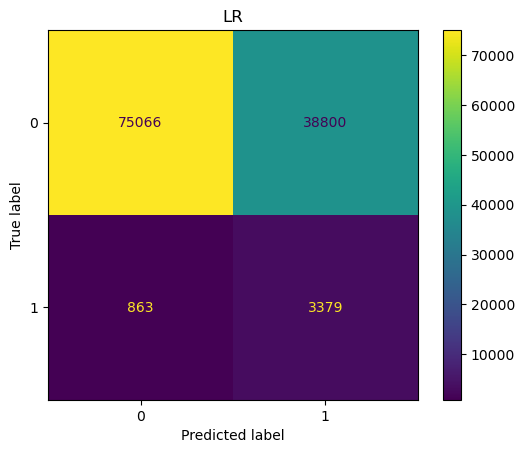

              precision    recall  f1-score   support

           0       0.99      0.66      0.79    113866
           1       0.08      0.80      0.15      4242

    accuracy                           0.66    118108
   macro avg       0.53      0.73      0.47    118108
weighted avg       0.96      0.66      0.77    118108



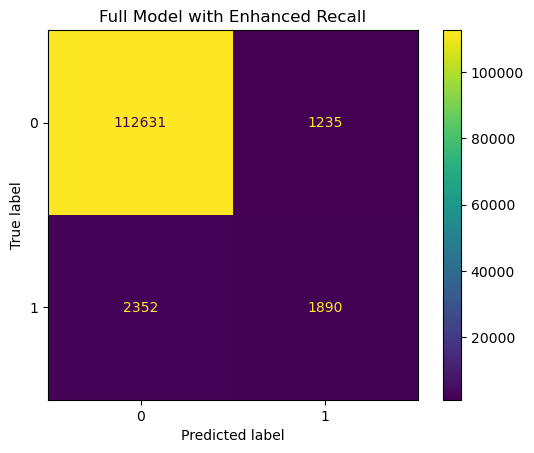

              precision    recall  f1-score   support

           0       0.98      0.99      0.98    113866
           1       0.60      0.45      0.51      4242

    accuracy                           0.97    118108
   macro avg       0.79      0.72      0.75    118108
weighted avg       0.97      0.97      0.97    118108



In [12]:
# Create and train the ML models
p_knn, p_lda, p_lr = define_primary_models(X_train, y_train)

lr_mean = p_lr.mean()

# Apply the enhanced recall logic
p_er = enhanced_recall(p_knn, p_lda, p_lr, lr_mean)

#  Convert LR value to discrete by comparing prediction to mean
p_lr_d = get_lr_d_values(p_lr, lr_mean)

# Training data eval
print("Training Data Evaluation")
print("Scores with Full Imbalanced Data using Documented Model and Hyperparameters")
print('Uses 5 Fold Cross-Validation')
cm_report = get_classifcation_report(y_train, p_knn, 'KNN')
print(cm_report)

cm_report = get_classifcation_report(y_train, p_lda, 'LDA')
print(cm_report)

cm_report = get_classifcation_report(y_train, p_lr_d, 'LR')
print(cm_report)

cm_report = get_classifcation_report(y_train, p_er, 'Full Model with Enhanced Recall')
print(cm_report)        

# validate on test data
p_knn, p_lda, p_lr = validate_primary_models(X_train, y_train, X_test)
p_er = enhanced_recall(p_knn, p_lda, p_lr, lr_mean)

#  Convert LR value to discrete by comparing prediction to mean
p_lr_d = get_lr_d_values(p_lr, lr_mean)

# test data eval
print("Test Data Evaluation")
print("Scores with Full Imbalanced Data using Documented Model and Hyperparameters")
print('Models Trained with Complete Training Dataset.  Predictions Made with Test Dataset')

cm_report = get_classifcation_report(y_test, p_knn, 'KNN')
print(cm_report)


cm_report = get_classifcation_report(y_test, p_lda, 'LDA')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_lr_d, 'LR')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_er, 'Full Model with Enhanced Recall')
print(cm_report)               

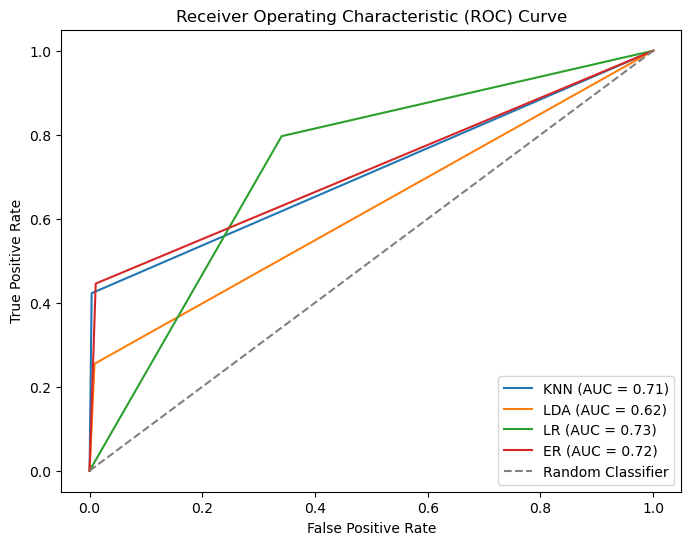

In [13]:
p_mods = [p_knn, p_lda, p_lr_d, p_er]
mnames = ['KNN', 'LDA', 'LR', 'ER']
plot_roc(p_mods, mnames)

Second iteration:  Primary paper's Enhanced Recall Ensemble model using SMOTE oversampling of the minority class to improve accuraccy by dealing with the imbalanced data.

After the Application of SMOTE Oversampling of the Minority Class:
Number of Rows Features: 500000
Number of Rows Fraud: 250141
Number of Rows Not Fraud: 249859
Training Data Evaluation
Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters
Uses 5 Fold Cross-Validation


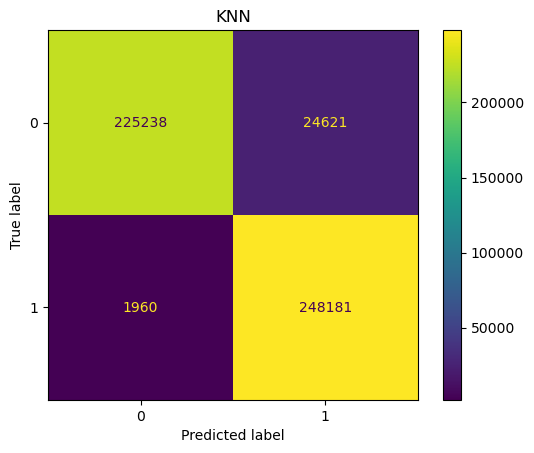

              precision    recall  f1-score   support

           0       0.99      0.90      0.94    249859
           1       0.91      0.99      0.95    250141

    accuracy                           0.95    500000
   macro avg       0.95      0.95      0.95    500000
weighted avg       0.95      0.95      0.95    500000



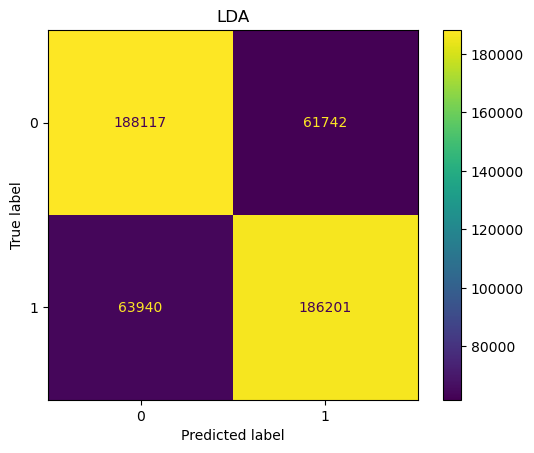

              precision    recall  f1-score   support

           0       0.75      0.75      0.75    249859
           1       0.75      0.74      0.75    250141

    accuracy                           0.75    500000
   macro avg       0.75      0.75      0.75    500000
weighted avg       0.75      0.75      0.75    500000



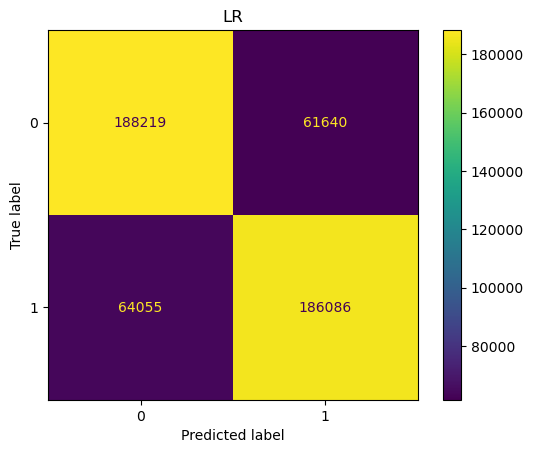

              precision    recall  f1-score   support

           0       0.75      0.75      0.75    249859
           1       0.75      0.74      0.75    250141

    accuracy                           0.75    500000
   macro avg       0.75      0.75      0.75    500000
weighted avg       0.75      0.75      0.75    500000



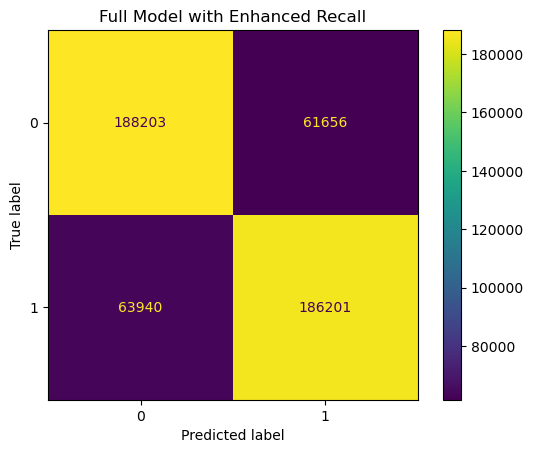

              precision    recall  f1-score   support

           0       0.75      0.75      0.75    249859
           1       0.75      0.74      0.75    250141

    accuracy                           0.75    500000
   macro avg       0.75      0.75      0.75    500000
weighted avg       0.75      0.75      0.75    500000

Test Data Evaluation
Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters
Models Trained with Complete Training Dataset.  Predictions Made with Test Dataset


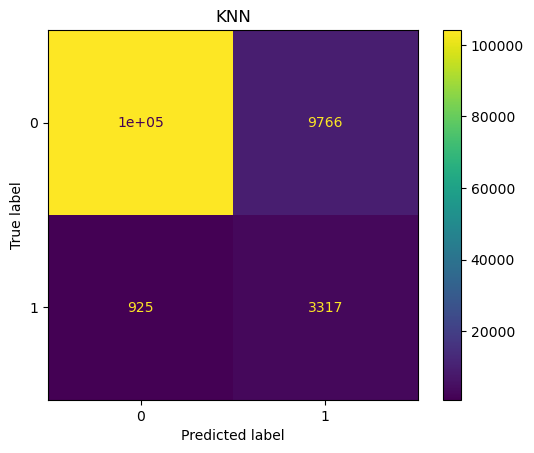

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    113866
           1       0.25      0.78      0.38      4242

    accuracy                           0.91    118108
   macro avg       0.62      0.85      0.67    118108
weighted avg       0.96      0.91      0.93    118108



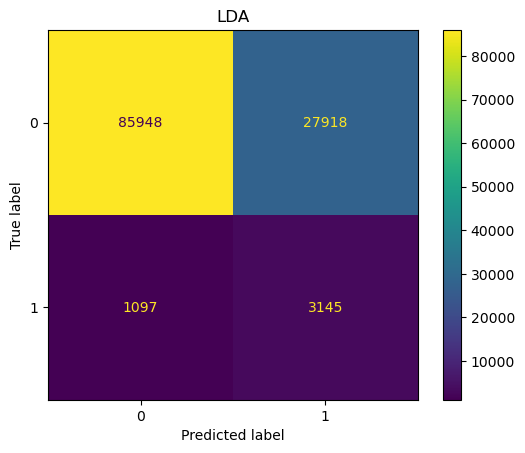

              precision    recall  f1-score   support

           0       0.99      0.75      0.86    113866
           1       0.10      0.74      0.18      4242

    accuracy                           0.75    118108
   macro avg       0.54      0.75      0.52    118108
weighted avg       0.96      0.75      0.83    118108



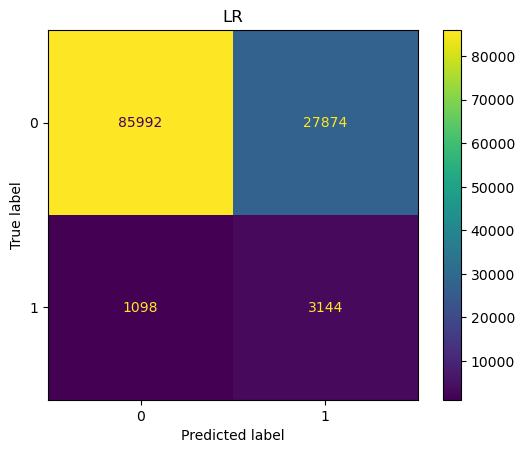

              precision    recall  f1-score   support

           0       0.99      0.76      0.86    113866
           1       0.10      0.74      0.18      4242

    accuracy                           0.75    118108
   macro avg       0.54      0.75      0.52    118108
weighted avg       0.96      0.75      0.83    118108



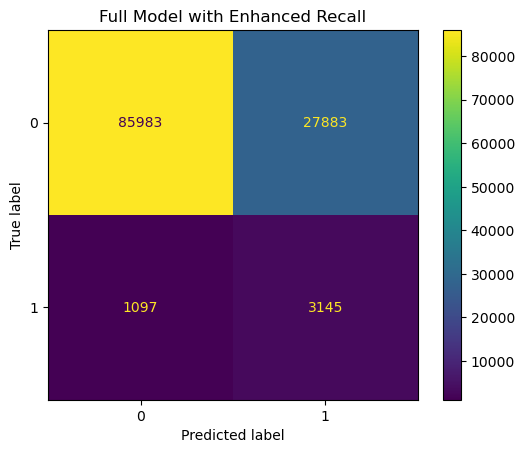

              precision    recall  f1-score   support

           0       0.99      0.76      0.86    113866
           1       0.10      0.74      0.18      4242

    accuracy                           0.75    118108
   macro avg       0.54      0.75      0.52    118108
weighted avg       0.96      0.75      0.83    118108



In [9]:
from imblearn.over_sampling import SMOTE

# SMOTE Oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Now that both classes have been equalized, scale down the dataset to prevent overfitting
subset_size = 500000  # Specify the desired size of the subset
indices = np.random.choice(X_smote.shape[0], size=subset_size, replace=False)
X_smote = X_smote[indices]
y_smote = y_smote[indices]

print("After the Application of SMOTE Oversampling of the Minority Class:")
print("Number of Rows Features:", len(X_smote))
print("Number of Rows Fraud:",(y_smote == 1).sum())
print("Number of Rows Not Fraud:", (y_smote == 0).sum())

# Create and train the ML models
p_knn, p_lda, p_lr = define_primary_models(X_smote, y_smote)    


lr_mean = p_lr.mean()

# Apply the enhanced recall logic
p_er = enhanced_recall(p_knn, p_lda, p_lr, p_lr.mean())

#  Convert LR value to discrete by comparing prediction to mean
p_lr_d = get_lr_d_values(p_lr, lr_mean)

# Evalute
print("Training Data Evaluation")
print("Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters")
print('Uses 5 Fold Cross-Validation')
cm_report = get_classifcation_report(y_smote, p_knn, 'KNN')
print(cm_report)

cm_report = get_classifcation_report(y_smote, p_lda, 'LDA')
print(cm_report)

cm_report = get_classifcation_report(y_smote, p_lr_d, 'LR')
print(cm_report)

cm_report = get_classifcation_report(y_smote, p_er, 'Full Model with Enhanced Recall')
print(cm_report)

# validate on test data
p_knn, p_lda, p_lr = validate_primary_models(X_smote, y_smote, X_test)
p_er = enhanced_recall(p_knn, p_lda, p_lr, lr_mean)

#  Convert LR value to discrete by comparing prediction to mean
p_lr_d = get_lr_d_values(p_lr, lr_mean)

# test data eval
print("Test Data Evaluation")
print("Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters")
print('Models Trained with Complete Training Dataset.  Predictions Made with Test Dataset')
cm_report = get_classifcation_report(y_test, p_knn, 'KNN')
print(cm_report)


cm_report = get_classifcation_report(y_test, p_lda, 'LDA')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_lr_d, 'LR')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_er, 'Full Model with Enhanced Recall')
print(cm_report)         


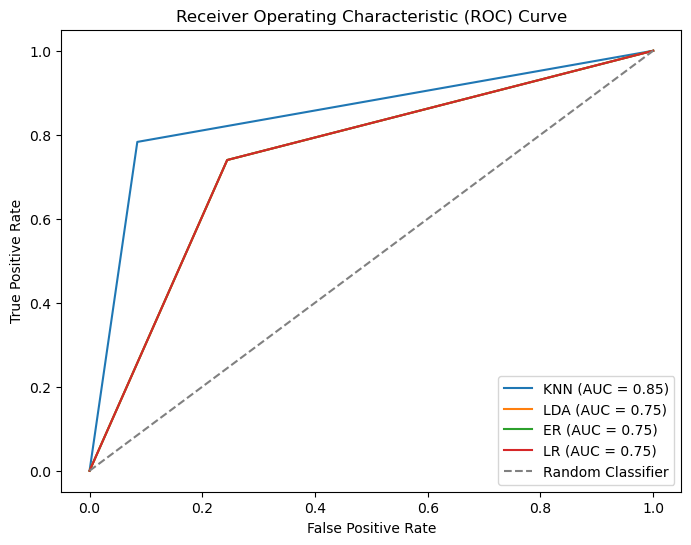

In [16]:
p_mods = [p_knn, p_lda, p_er, p_lr_d]
mnames = ['KNN', 'LDA', 'ER', 'LR']
plot_roc(p_mods, mnames)

Now that we've tried the hyperparameters in the paper, let's see if a grid search suggests different values.

In [10]:
# call grid search functions

best_lr_parms = get_best_lr_parms(X_smote, y_smote)

# print results
print('Best Linear Regression Hyperparameters:', best_lr_parms)

Best Linear Regression Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}


In [11]:
best_lda_parms = get_best_lda_parms(X_smote, y_smote)
print('Best LDA Hyperparameters:', best_lda_parms)

C:\Users\cpiac\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
126 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\cpiac\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\cpiac\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py", line 631, in fit
    self._solve_eigen(
  File "C:\Users\cpiac\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py", line 463, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
                   ^^^^^^^^^^^^^

Best LDA Hyperparameters: {'covariance_estimator': None, 'n_components': None, 'priors': None, 'shrinkage': None, 'solver': 'svd', 'store_covariance': True, 'tol': 0.0001}


In [ ]:
from sklearn.model_selection import train_test_split
X_smote_kg, _, y_smote_kg, _ = train_test_split(X_smote, y_smote, test_size=0.6, random_state=42)

best_knn_parms = get_best_knn_parms(X_smote_kg, y_smote_kg)
print('Best KNN Hyperparameters:', best_knn_parms)

Try the model again using the hyperparameters from the grid search

In [ ]:
# set best_knn_parms manual as grid search is taking 24 hours+
# best_knn_parms = {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 5, 'p': 2, 'weights': 'uniform', 'n_jobs': -1} # original
#best_knn_parms = {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
print(best_knn_parms)
print(best_lda_parms)
print(best_lr_parms)

In [ ]:
X_smote

Training Data Evaluation
Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters with
Hyperparameters Updated with Best Parameter Values Returned by Grid Search


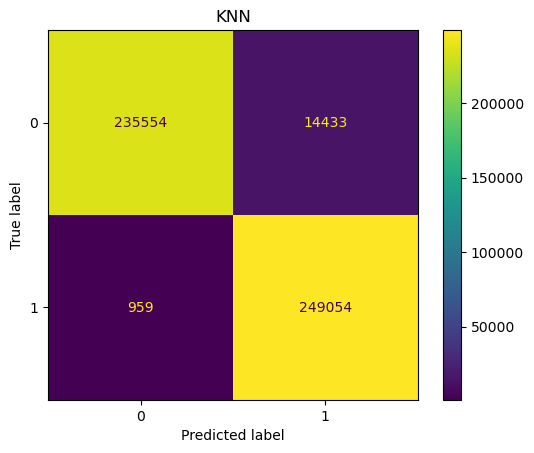

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    249987
           1       0.95      1.00      0.97    250013

    accuracy                           0.97    500000
   macro avg       0.97      0.97      0.97    500000
weighted avg       0.97      0.97      0.97    500000



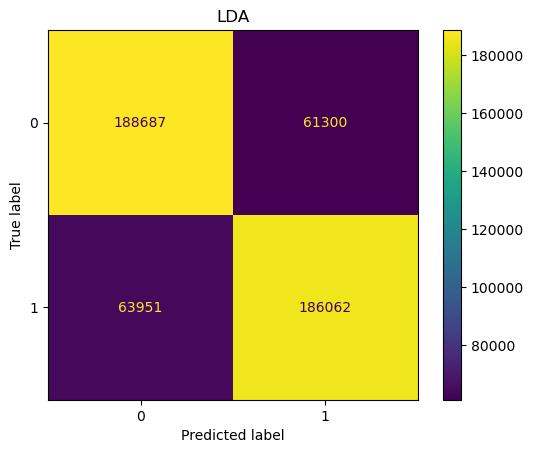

              precision    recall  f1-score   support

           0       0.75      0.75      0.75    249987
           1       0.75      0.74      0.75    250013

    accuracy                           0.75    500000
   macro avg       0.75      0.75      0.75    500000
weighted avg       0.75      0.75      0.75    500000



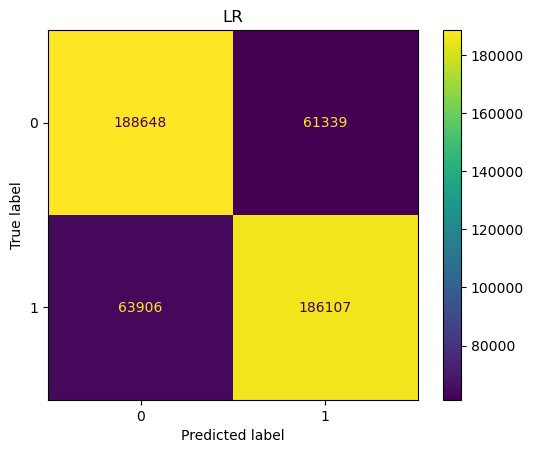

              precision    recall  f1-score   support

           0       0.75      0.75      0.75    249987
           1       0.75      0.74      0.75    250013

    accuracy                           0.75    500000
   macro avg       0.75      0.75      0.75    500000
weighted avg       0.75      0.75      0.75    500000



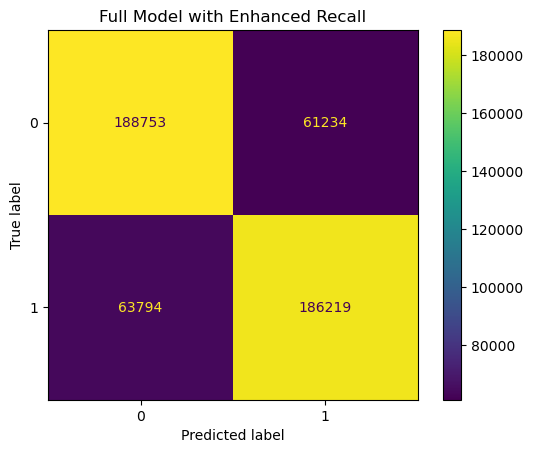

              precision    recall  f1-score   support

           0       0.75      0.76      0.75    249987
           1       0.75      0.74      0.75    250013

    accuracy                           0.75    500000
   macro avg       0.75      0.75      0.75    500000
weighted avg       0.75      0.75      0.75    500000

Test Data Evaluation
Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters with
Hyperparameters Updated with Best Parameter Values Returned by Grid Search
Models Trained with Complete Training Dataset.  Predictions Made with Test Dataset


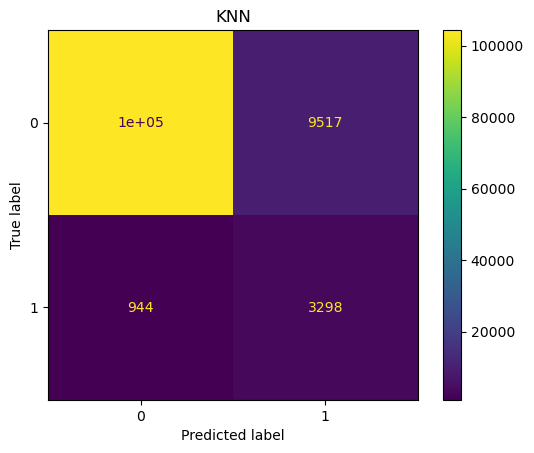

              precision    recall  f1-score   support

           0       0.99      0.92      0.95    113866
           1       0.26      0.78      0.39      4242

    accuracy                           0.91    118108
   macro avg       0.62      0.85      0.67    118108
weighted avg       0.96      0.91      0.93    118108



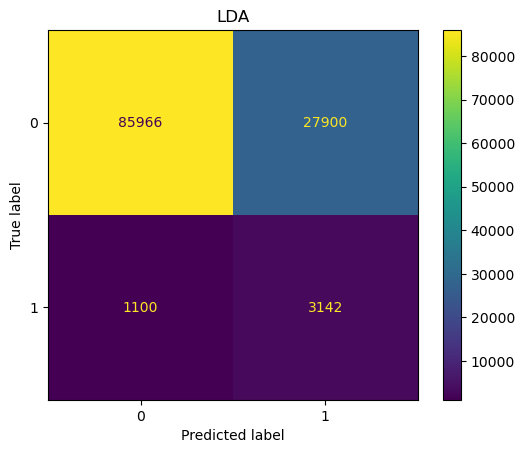

              precision    recall  f1-score   support

           0       0.99      0.75      0.86    113866
           1       0.10      0.74      0.18      4242

    accuracy                           0.75    118108
   macro avg       0.54      0.75      0.52    118108
weighted avg       0.96      0.75      0.83    118108



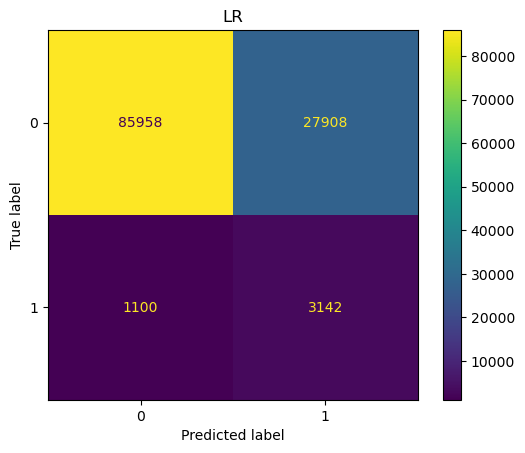

              precision    recall  f1-score   support

           0       0.99      0.75      0.86    113866
           1       0.10      0.74      0.18      4242

    accuracy                           0.75    118108
   macro avg       0.54      0.75      0.52    118108
weighted avg       0.96      0.75      0.83    118108



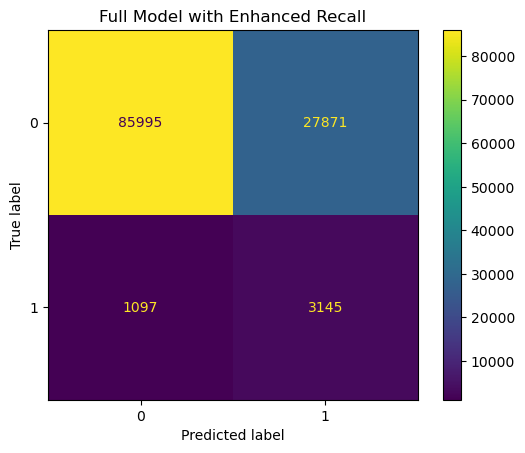

              precision    recall  f1-score   support

           0       0.99      0.76      0.86    113866
           1       0.10      0.74      0.18      4242

    accuracy                           0.75    118108
   macro avg       0.54      0.75      0.52    118108
weighted avg       0.96      0.75      0.83    118108



In [51]:
##### Create and train the ML models
p_knn, p_lda, p_lr = define_primary_models_tuned(X_smote, y_smote, best_knn_parms, best_lda_parms, best_lr_parms)
# Apply the enhanced recall logic

lr_mean = p_lr.mean()
p_er = enhanced_recall(p_knn, p_lda, p_lr, p_lr.mean())
p_lr_d = get_lr_d_values(p_lr, lr_mean)

# Evalute
print("Training Data Evaluation")
print("Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters with")
print("Hyperparameters Updated with Best Parameter Values Returned by Grid Search")
cm_report = get_classifcation_report(y_smote, p_knn, 'KNN')
print(cm_report)

cm_report = get_classifcation_report(y_smote, p_lda, 'LDA')
print(cm_report)

cm_report = get_classifcation_report(y_smote, p_lr_d, 'LR')
print(cm_report)

cm_report = get_classifcation_report(y_smote, p_er, 'Full Model with Enhanced Recall')
print(cm_report)

# validate on test data
p_knn, p_lda, p_lr = validate_primary_models(X_smote, y_smote, X_test)
p_er = enhanced_recall(p_knn, p_lda, p_lr, lr_mean)


p_knn, p_lda, p_lr = validate_primary_models_tuned(X_smote, y_smote, X_test, best_knn_parms, best_lda_parms, best_lr_parms)
p_er = enhanced_recall(p_knn, p_lda, p_lr, lr_mean)
#  Convert LR value to discrete by comparing prediction to mean
p_lr_d = get_lr_d_values(p_lr, lr_mean)

# test data eval
print("Test Data Evaluation")
print("Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters with")
print("Hyperparameters Updated with Best Parameter Values Returned by Grid Search")
print('Models Trained with Complete Training Dataset.  Predictions Made with Test Dataset')
cm_report = get_classifcation_report(y_test, p_knn, 'KNN')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_lda, 'LDA')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_lr_d, 'LR')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_er, 'Full Model with Enhanced Recall')
print(cm_report)         

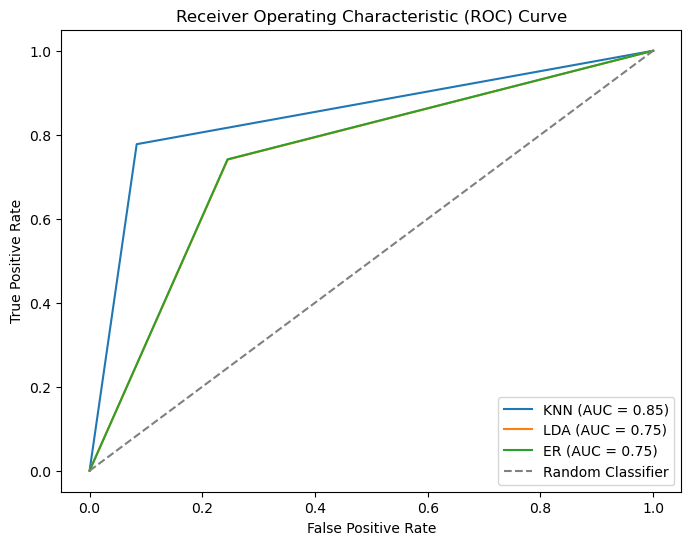

In [50]:
p_mods = [p_knn, p_lda, p_er]
mnames = ['KNN', 'LDA', 'ER']
plot_roc(p_mods, mnames)

Try the secondary papers models

C:\Users\cpiac\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Data Evaluation
Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters


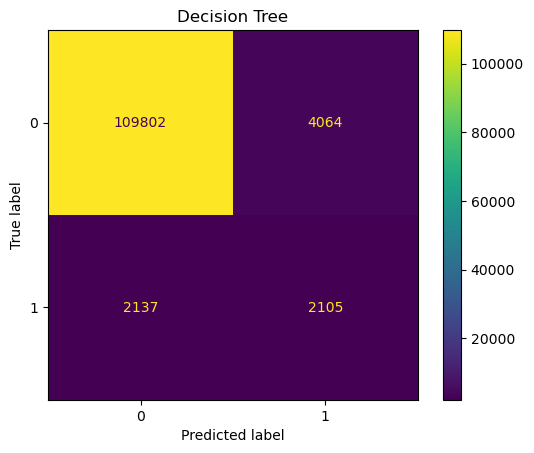

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    113866
           1       0.34      0.50      0.40      4242

    accuracy                           0.95    118108
   macro avg       0.66      0.73      0.69    118108
weighted avg       0.96      0.95      0.95    118108



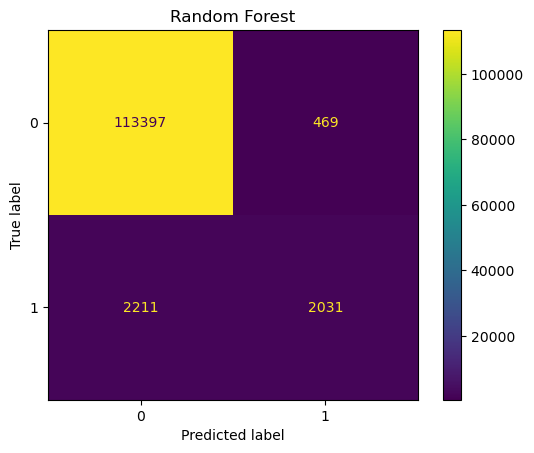

              precision    recall  f1-score   support

           0       0.98      1.00      0.99    113866
           1       0.81      0.48      0.60      4242

    accuracy                           0.98    118108
   macro avg       0.90      0.74      0.80    118108
weighted avg       0.97      0.98      0.97    118108



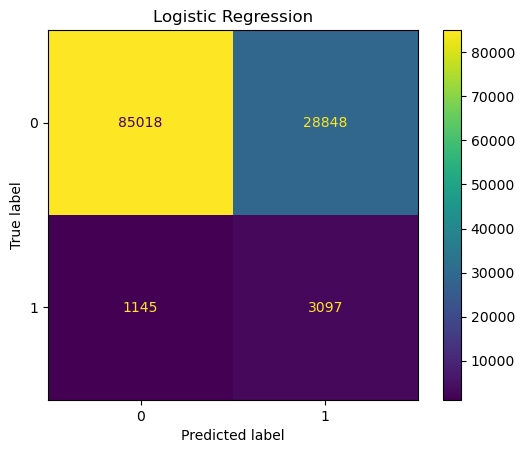

              precision    recall  f1-score   support

           0       0.99      0.75      0.85    113866
           1       0.10      0.73      0.17      4242

    accuracy                           0.75    118108
   macro avg       0.54      0.74      0.51    118108
weighted avg       0.95      0.75      0.83    118108



In [18]:
# Create, train and test the ML models
p_dt, p_rf, p_log_r = define_secondary_models(X_smote, y_smote, X_test)

# test data eval
print("Test Data Evaluation")
print("Scores after the Application of SMOTE Oversampling of the Minority Class using Documented Model and Hyperparameters")

cm_report = get_classifcation_report(y_test, p_dt, 'Decision Tree')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_rf, 'Random Forest')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_log_r, 'Logistic Regression')
print(cm_report)         

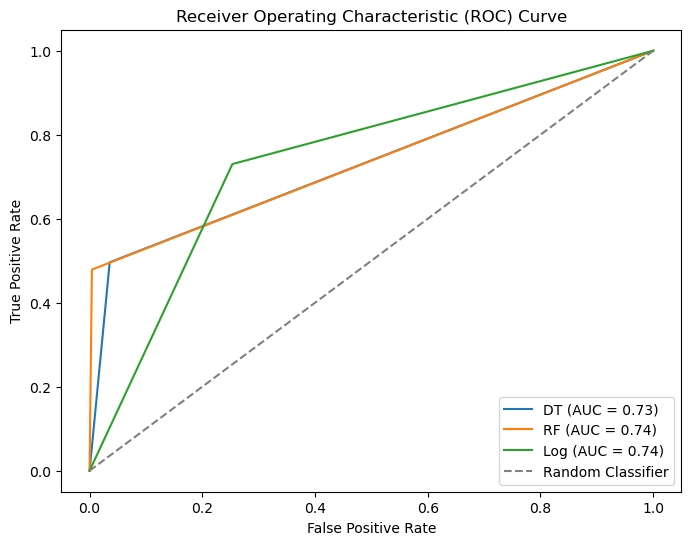

In [19]:
p_mods = [p_dt, p_rf, p_log_r]
mnames = ['DT', 'RF', 'Log']
plot_roc(p_mods, mnames)

Try the tertiary paper's models.  Reduce the dataset to account for long runtimes

Test Data Evaluation


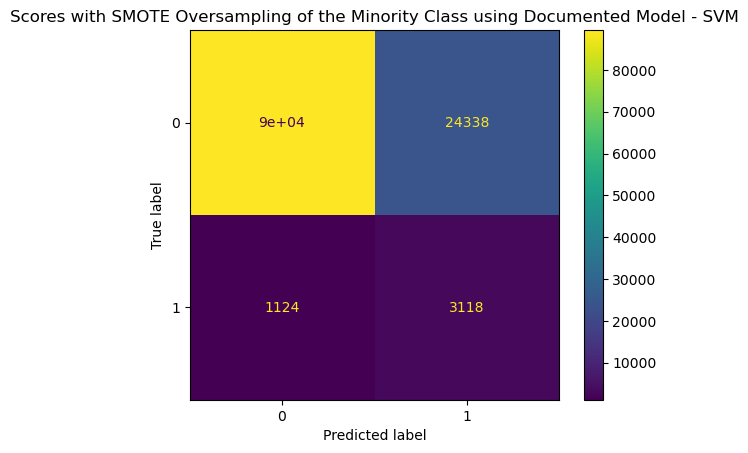

              precision    recall  f1-score   support

           0       0.99      0.79      0.88    113866
           1       0.11      0.74      0.20      4242

    accuracy                           0.78    118108
   macro avg       0.55      0.76      0.54    118108
weighted avg       0.96      0.78      0.85    118108



In [20]:
from sklearn.model_selection import train_test_split
# Only use 20% of the data for reasonable runtime
X_smote_u, _, y_smote_u, _ = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)
# Create, train and test the ML models
hyperparameters = {'C': 10.0, 'kernel': 'rbf', 'gamma': 0.01, 'class_weight': 'balanced'}
p_svm = define_tertiary_models(X_smote_u, y_smote_u, X_test, hyperparameters)

# test data eval
print("Test Data Evaluation")
cm_report = get_classifcation_report(y_test, p_svm, 'Scores with SMOTE Oversampling of the Minority Class using Documented Model - SVM')
print(cm_report)

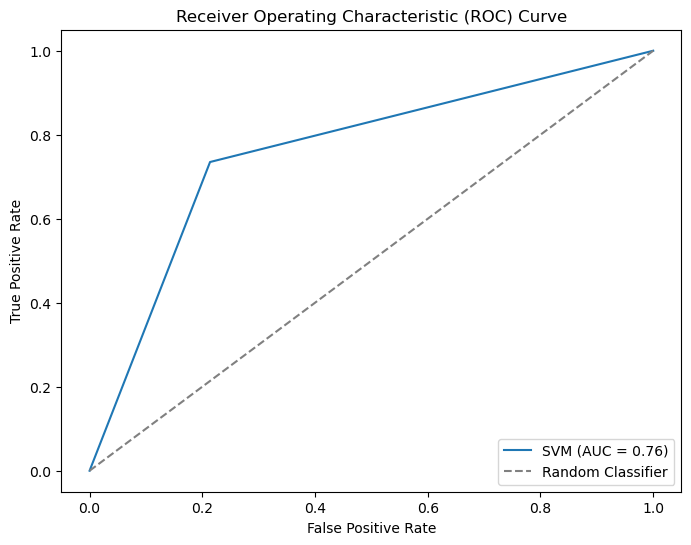

In [21]:
p_mods = [p_svm]
mnames = ['SVM']
plot_roc(p_mods, mnames)

With some many features let's do some additional dimensionality reduction using PCA

In [40]:
from sklearn.decomposition import PCA

# Apply PCA tried 50, 100, 150
n_components = 50  # Adjust this value as needed
pca = PCA(n_components=n_components)
X_smote_pca = pca.fit_transform(X_smote)

# Apply the same PCA transformation to the test data
X_test_pca = pca.transform(X_test)

In [88]:
print(X_smote.shape)
print(y_smote.shape)
print(X_smote_pca.shape)
print(y_smote.shape)
print(X_test.shape)
print(X_test_pca.shape)
print(y_test.shape)

(500000, 199)
(500000,)
(500000, 50)
(500000,)
(118108, 199)
(118108, 50)
(118108,)


Trying the Primary Model after PCA

Training Data Evaluation
Scores with Full Imbalanced Data using Documented Model and Hyperparameters
Uses 5 Fold Cross-Validation


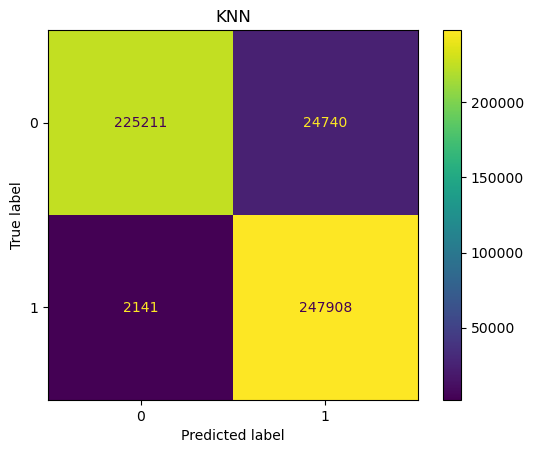

              precision    recall  f1-score   support

           0       0.99      0.90      0.94    249951
           1       0.91      0.99      0.95    250049

    accuracy                           0.95    500000
   macro avg       0.95      0.95      0.95    500000
weighted avg       0.95      0.95      0.95    500000



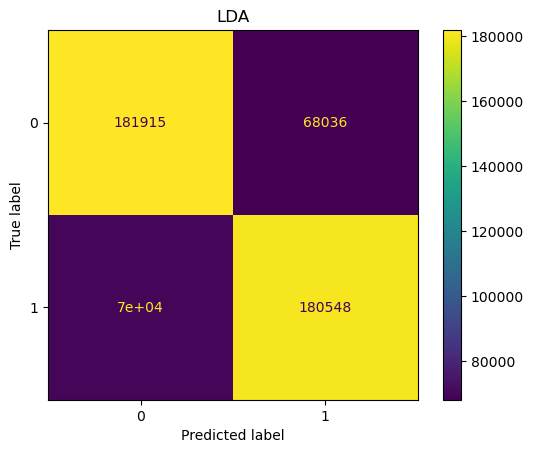

              precision    recall  f1-score   support

           0       0.72      0.73      0.73    249951
           1       0.73      0.72      0.72    250049

    accuracy                           0.72    500000
   macro avg       0.72      0.72      0.72    500000
weighted avg       0.72      0.72      0.72    500000



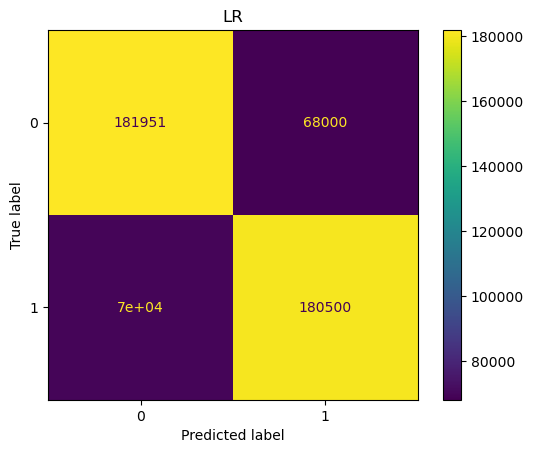

              precision    recall  f1-score   support

           0       0.72      0.73      0.73    249951
           1       0.73      0.72      0.72    250049

    accuracy                           0.72    500000
   macro avg       0.72      0.72      0.72    500000
weighted avg       0.72      0.72      0.72    500000



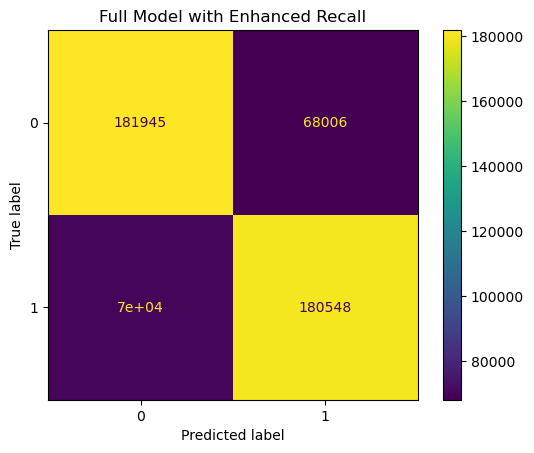

              precision    recall  f1-score   support

           0       0.72      0.73      0.73    249951
           1       0.73      0.72      0.72    250049

    accuracy                           0.72    500000
   macro avg       0.72      0.72      0.72    500000
weighted avg       0.72      0.72      0.72    500000

Test Data Evaluation
Scores with Full Imbalanced Data using Documented Model and Hyperparameters
Models Trained with Complete Training Dataset.  Predictions Made with Test Dataset


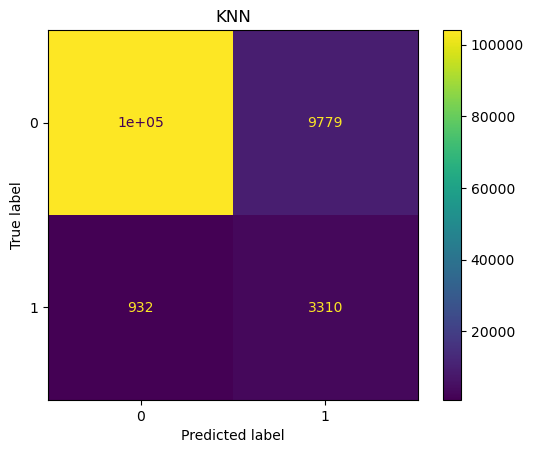

              precision    recall  f1-score   support

           0       0.99      0.91      0.95    113866
           1       0.25      0.78      0.38      4242

    accuracy                           0.91    118108
   macro avg       0.62      0.85      0.67    118108
weighted avg       0.96      0.91      0.93    118108



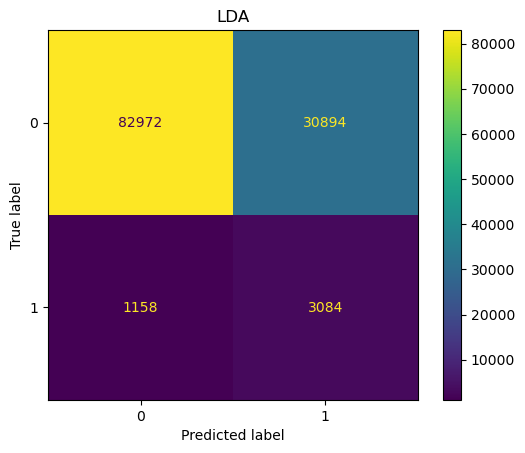

              precision    recall  f1-score   support

           0       0.99      0.73      0.84    113866
           1       0.09      0.73      0.16      4242

    accuracy                           0.73    118108
   macro avg       0.54      0.73      0.50    118108
weighted avg       0.95      0.73      0.81    118108



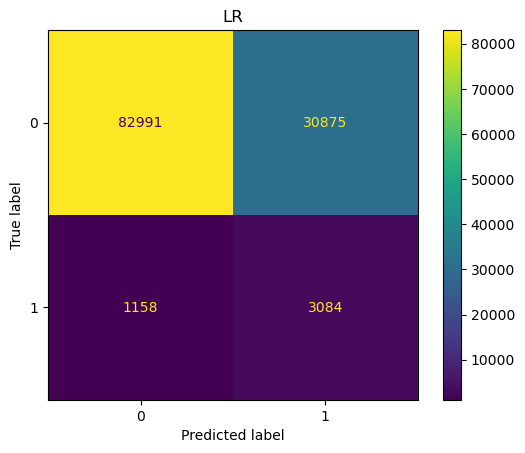

              precision    recall  f1-score   support

           0       0.99      0.73      0.84    113866
           1       0.09      0.73      0.16      4242

    accuracy                           0.73    118108
   macro avg       0.54      0.73      0.50    118108
weighted avg       0.95      0.73      0.81    118108



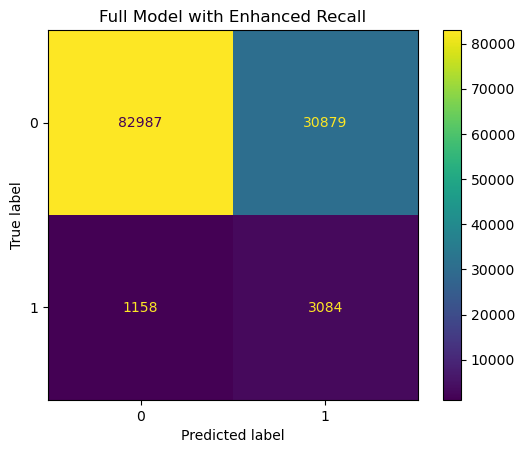

              precision    recall  f1-score   support

           0       0.99      0.73      0.84    113866
           1       0.09      0.73      0.16      4242

    accuracy                           0.73    118108
   macro avg       0.54      0.73      0.50    118108
weighted avg       0.95      0.73      0.81    118108



In [42]:
# Create and train the ML models
p_knn, p_lda, p_lr = define_primary_models(X_smote_pca, y_smote)

lr_mean = p_lr.mean()

# Apply the enhanced recall logic
p_er = enhanced_recall(p_knn, p_lda, p_lr, lr_mean)

#  Convert LR value to discrete by comparing prediction to mean
p_lr_d = get_lr_d_values(p_lr, lr_mean)

# Training data eval
print("Training Data Evaluation")
print("Scores with Full Imbalanced Data using Documented Model and Hyperparameters")
print('Uses 5 Fold Cross-Validation')
cm_report = get_classifcation_report(y_smote, p_knn, 'KNN')
print(cm_report)

cm_report = get_classifcation_report(y_smote, p_lda, 'LDA')
print(cm_report)

cm_report = get_classifcation_report(y_smote, p_lr_d, 'LR')
print(cm_report)

cm_report = get_classifcation_report(y_smote, p_er, 'Full Model with Enhanced Recall')
print(cm_report)        

# validate on test data
p_knn, p_lda, p_lr = validate_primary_models(X_smote_pca, y_smote, X_test_pca)
p_er = enhanced_recall(p_knn, p_lda, p_lr, lr_mean)

#  Convert LR value to discrete by comparing prediction to mean
p_lr_d = get_lr_d_values(p_lr, lr_mean)

# test data eval
print("Test Data Evaluation")
print("Scores with Full Imbalanced Data using Documented Model and Hyperparameters")
print('Models Trained with Complete Training Dataset.  Predictions Made with Test Dataset')

cm_report = get_classifcation_report(y_test, p_knn, 'KNN')
print(cm_report)


cm_report = get_classifcation_report(y_test, p_lda, 'LDA')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_lr_d, 'LR')
print(cm_report)

cm_report = get_classifcation_report(y_test, p_er, 'Full Model with Enhanced Recall')
print(cm_report)         

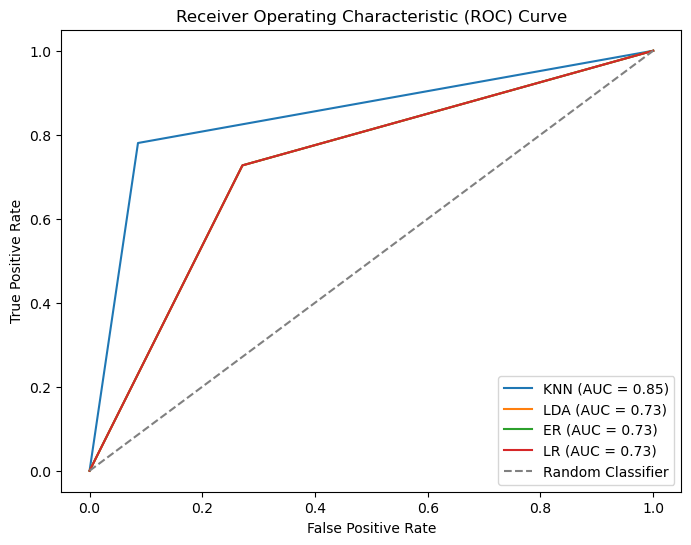

In [43]:
p_mods = [p_knn, p_lda, p_er, p_lr_d]
mnames = ['KNN', 'LDA', 'ER', 'LR']
plot_roc(p_mods, mnames)